<div align="center" style="color:black; font-size:16px;">
  <b>CVEN 5325: Fundamentals of Air Pollution</b>
</div>
<br>
<div align="center" style="color:darkblue; font-size:24px;">
  <b>Modeling Formaldehyde Concentration in Water</b><br>
  <span style="font-size:18px;">Temperature-Dependent Emission and Absorption in a Commercial Establishment</span>
</div>


<h3><center><font color = 'teal'> Aalok Sharma Kafle, MS, EIT </font></center></h3>

### Problem Statement
A carpeted area of $80 \, \text{m}^2$ in a commercial establishment emits formaldehyde ($ \text{HCHO} $) at a rate of $0.05 \, \text{mg/m}^2\cdot\text{h}$ at $22^\circ \text{C}$. The emission rate changes with temperature as follows:
- **Increase by 2%** per degree above $22^\circ \text{C}$.
- **Decrease by 1%** per degree below $22^\circ \text{C}$.

The establishment is $10 \, \text{m} \times 10 \, \text{m} \times 3 \, \text{m}$ in volume, with the following temperatures over 24 hours:
- **Morning (6 hours):** $10^\circ \text{C}$
- **Afternoon (6 hours):** $25^\circ \text{C}$
- **Evening (6 hours):** $22^\circ \text{C}$
- **Night (6 hours):** $15^\circ \text{C}$

Compute the concentration of formaldehyde ($ \text{HCHO} $) in a glass of water left in the room. The calculations consider the following:
- **Henry's Law Constant ($ H $):**
  - $ H = 5020 \, \text{M/atm} $ at $293 \, \text{K}$,
  - Temperature dependence given by:
    $$
    \ln H = \frac{6423 \pm 542}{T} - (13.4 \pm 2.0),
    $$
    where $ T $ is in Kelvin.


### Step 1: Constants and Parameters
Define the constants and parameters used for emission rates, room dimensions, and Henry's Law calculations.


In [2]:
import numpy as np

# Room dimensions and properties
room_area = 10 * 10  # m²
room_volume = 10 * 10 * 3  # m³
carpet_area = 80  # m²

# Emission rate and temperature adjustment factors
base_emission_rate = 0.05  # mg/m²·h at 22°C
temp_change_above = 0.02  # +2% per degree above 22°C
temp_change_below = -0.01  # -1% per degree below 22°C

# Henry's Law constant parameters
H_ref = 5020  # M/atm at 293 K
A = 6423  # Arrhenius numerator
B = -13.4  # Arrhenius offset
T_ref = 293  # Reference temperature (K)

# Time periods and temperatures (in hours and °C)
time_periods = [6, 6, 6, 6]  # hours for Morning, Afternoon, Evening, Night
temperatures = [10, 25, 22, 15]  # °C for Morning, Afternoon, Evening, Night

### Step 2: Temperature-Adjusted Emission Rates
Calculate the emission rate at each temperature using the formula:
$$
\text{Emission Rate} = \text{Base Rate} \times \left(1 + \Delta T \times \text{Change Factor}\right)
$$
where:
- $\Delta T = T - 22^\circ \text{C}$,
- Change Factor is $+2\%$ for $T > 22^\circ \text{C}$ and $-1\%$ for $T < 22^\circ \text{C}$.


In [4]:
# Calculate emission rates at different temperatures
emission_rates = []
for temp in temperatures:
    delta_T = temp - 22
    if delta_T > 0:
        rate = base_emission_rate * (1 + delta_T * temp_change_above)
    else:
        rate = base_emission_rate * (1 + delta_T * temp_change_below)
    emission_rates.append(rate)

emission_rates  # Display the emission rates in mg/m²·h


[0.05600000000000001, 0.053000000000000005, 0.05, 0.053500000000000006]

### Step 3: Henry's Law Constant Adjustment
Adjust Henry's Law constant for each temperature using the formula:
$$
\ln H = \frac{A}{T} + B
$$
where $ T $ is in Kelvin.


In [5]:
# Convert temperatures to Kelvin
temperatures_K = [temp + 273.15 for temp in temperatures]

# Calculate Henry's Law constant (H) for each temperature
henrys_law_constants = []
for T in temperatures_K:
    ln_H = (A / T) + B
    H = np.exp(ln_H)
    henrys_law_constants.append(H)

henrys_law_constants  # Display Henry's Law constants in M/atm


[10765.3691952874, 3438.6958322540495, 4280.46113994428, 7262.45867974884]

### Step 4: Compute Concentration of HCHO in Water
The formaldehyde concentration in water is given by: <br>
$$
C_{\text{water}} = \frac{C_{\text{air}}}{H}
$$ <br>
where $ C_{\text{air}} $ is the air concentration of formaldehyde, calculated from: <br>
$$
C_{\text{air}} = \frac{\text{Emission Rate} \times \text{Carpet Area}}{\text{Room Volume}}
$$
<br>
$$
H \text{ is Henry's Law constant at the corresponding temperature.}
$$


In [6]:
# Calculate air concentration (mg/m³) and water concentration (mg/L)
water_concentrations = []
for rate, H, T in zip(emission_rates, henrys_law_constants, temperatures_K):
    C_air = (rate * carpet_area) / room_volume  # mg/m³
    C_water = C_air / H  # mg/L
    water_concentrations.append(C_water)

water_concentrations  # Display water concentrations in mg/L


[1.3871640686387686e-06,
 4.110085341299e-06,
 3.1149291857621906e-06,
 1.9644403219048754e-06]

### Step 5: Visualization
Plot the formaldehyde concentration in water across the four time periods.


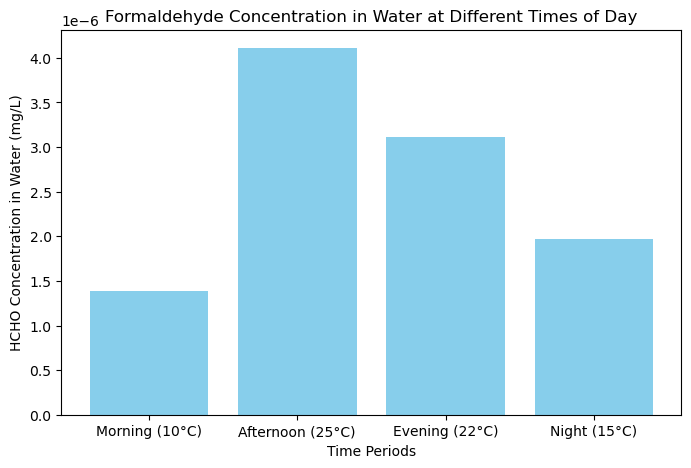

In [7]:
import matplotlib.pyplot as plt

# Plot results
time_labels = ["Morning (10°C)", "Afternoon (25°C)", "Evening (22°C)", "Night (15°C)"]

plt.figure(figsize=(8, 5))
plt.bar(time_labels, water_concentrations, color='skyblue')
plt.xlabel('Time Periods')
plt.ylabel('HCHO Concentration in Water (mg/L)')
plt.title('Formaldehyde Concentration in Water at Different Times of Day')
plt.show()


### Conclusion and Discussion
1. **Emission Rates:**
   - The emission rate increases during the afternoon ($25^\circ \text{C}$) and decreases during the morning ($10^\circ \text{C}$) and night ($15^\circ \text{C}$), as expected from the temperature dependency. 
   
<br>

2. **Henry's Law Constant:**
   - The constant decreases at higher temperatures, leading to a higher proportion of formaldehyde dissolving into water at lower temperatures.
   
<br>

3. **HCHO Concentration in Water:**
   - The highest concentration is observed during the morning ($10^\circ \text{C}$), where the low temperature leads to a higher Henry's Law constant and increased solubility.
   - The lowest concentration occurs during the afternoon ($25^\circ \text{C}$), as the lower Henry's Law constant reduces solubility.
   
   <br>

These findings demonstrate the critical impact of temperature on formaldehyde emission and its interaction with water.
